Projekat 1

Importovanje biblioteka

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [37]:
warnings.filterwarnings('ignore')

Ucitavanje podataka

In [6]:
data = pd.read_csv("Occupancy_Estimation.csv")


Prikaz podataka

In [8]:
data.head(10)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


Tipovi podataka

In [9]:
data.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [10]:
#Spajanje Date i Time u jedan atribut
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.drop(['Date', 'Time'], axis=1, inplace=True)

#Pretvaranje DateTime u timestamp
data['Timestamp'] = data['DateTime'].astype('int64') // 10**9
data = data.drop(["DateTime"], axis=1)

data.dtypes

S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
Timestamp                 int64
dtype: object

Provera nedostajucih vrednosti

In [11]:
data.isna().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
Timestamp               0
dtype: int64

In [12]:
# Broj instanci u dataset-u 
len(data)

10129

In [13]:
# Brisanje duplikata
data.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
10124    False
10125    False
10126    False
10127    False
10128    False
Length: 10129, dtype: bool

In [14]:
# Opis podataka
data.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Timestamp
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,1.012900e+04
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559,1.514406e+09
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633,6.229260e+05
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,1.513940e+09
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,1.514020e+09
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,1.514099e+09
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000,1.514264e+09
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000,1.515661e+09


Vrednosti za S3_Light i S5_CO2 imaju najveci opseg, pa je korisno ispitati njihovu distribuciju.

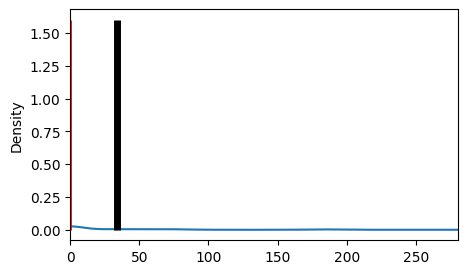

In [13]:
skewplot = data.S3_Light.plot(kind="density",
              figsize=(5,3),
              xlim=(data.S3_Light.min(),data.S3_Light.max()));
plt.vlines(data.S3_Light.mean(),
           ymin=0,
           ymax=1.6,
           linewidth=5.0,
           color="black");
plt.vlines(data.S3_Light.median(),
           ymin=0,
           ymax=1.6,
           linewidth=2.0,
           color="red");
plt.show()

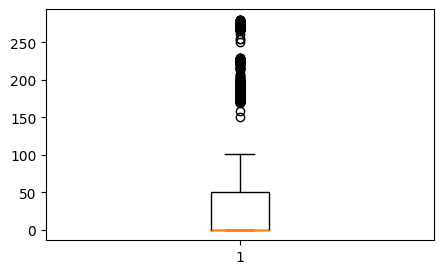

In [14]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(data.S3_Light)
plt.show()

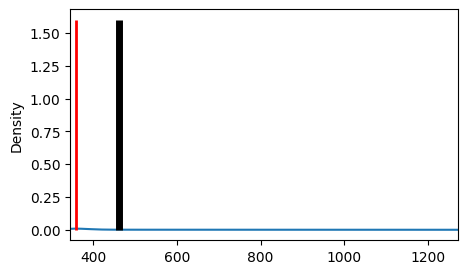

In [15]:
skewplot = data.S5_CO2.plot(kind="density",
              figsize=(5,3),
              xlim=(data.S5_CO2.min(),data.S5_CO2.max()));
plt.vlines(data.S5_CO2.mean(),
           ymin=0,
           ymax=1.6,
           linewidth=5.0,
           color="black");
plt.vlines(data.S5_CO2.median(),
           ymin=0,
           ymax=1.6,
           linewidth=2.0,
           color="red");
plt.show()

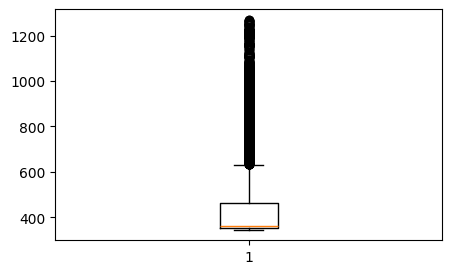

In [16]:
plt.figure(figsize=(5, 3))
boxplot = plt.boxplot(data.S5_CO2)
plt.show()

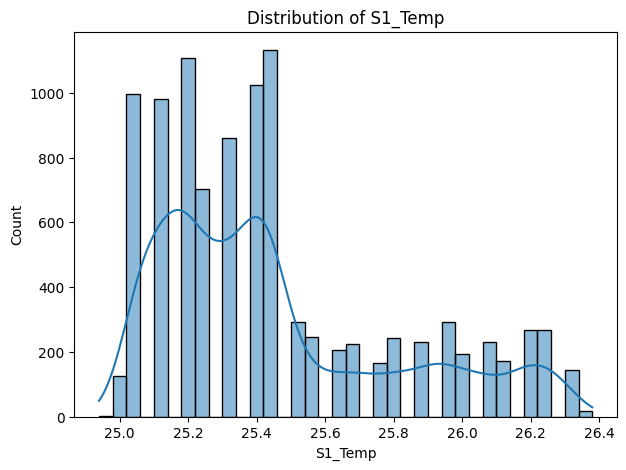

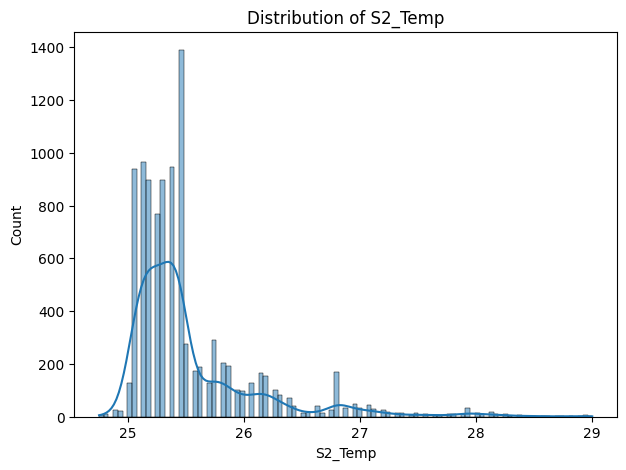

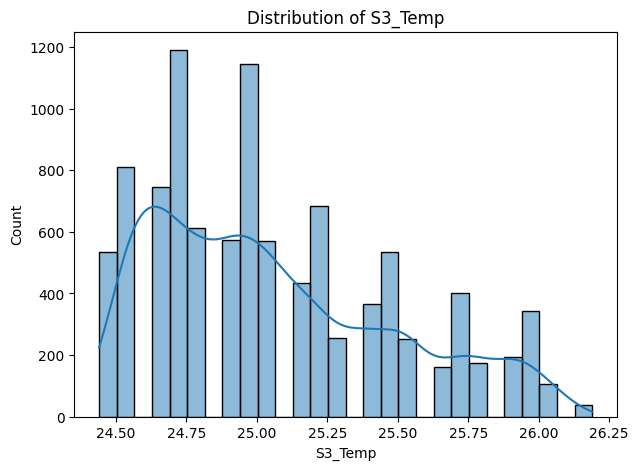

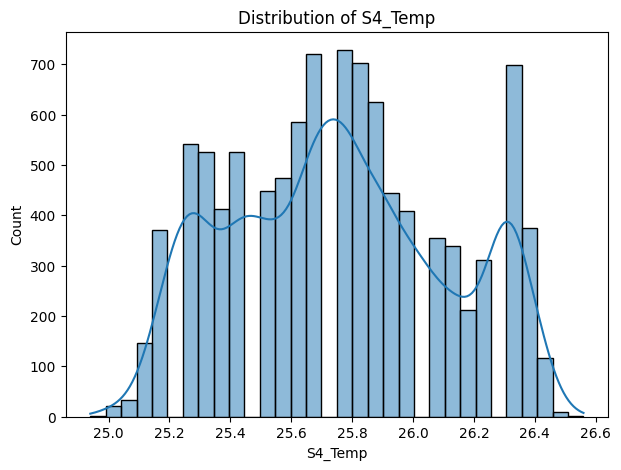

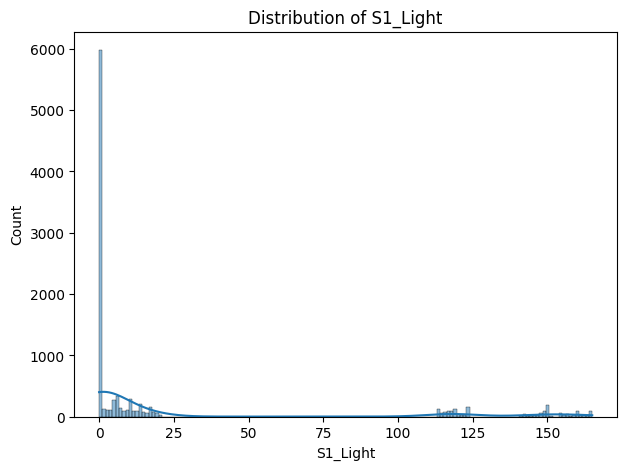

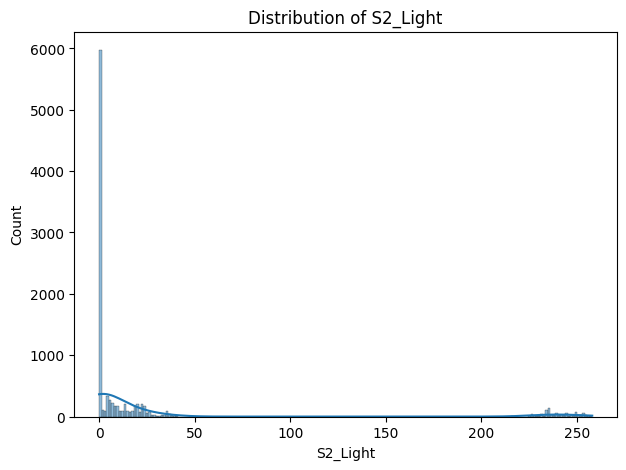

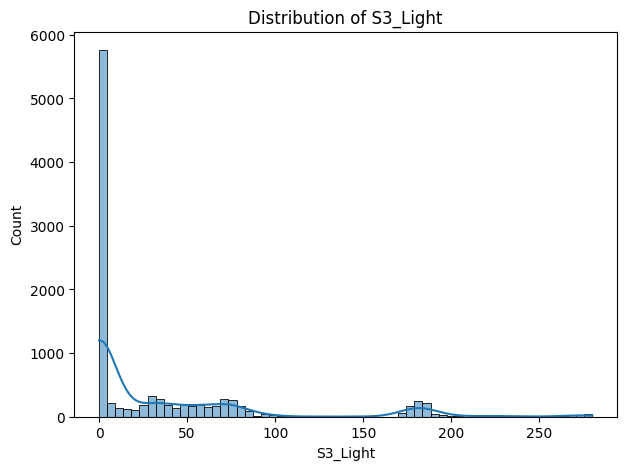

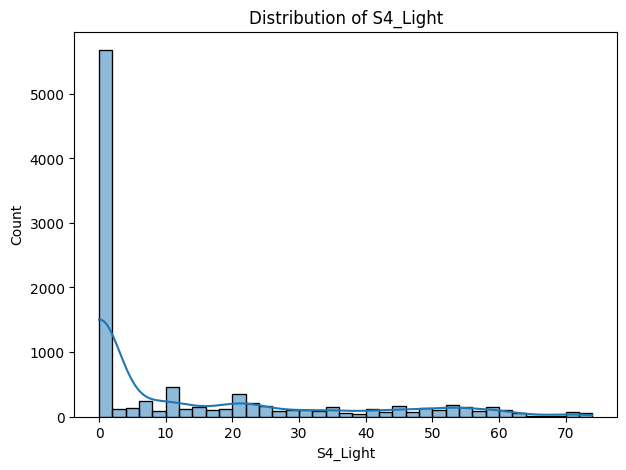

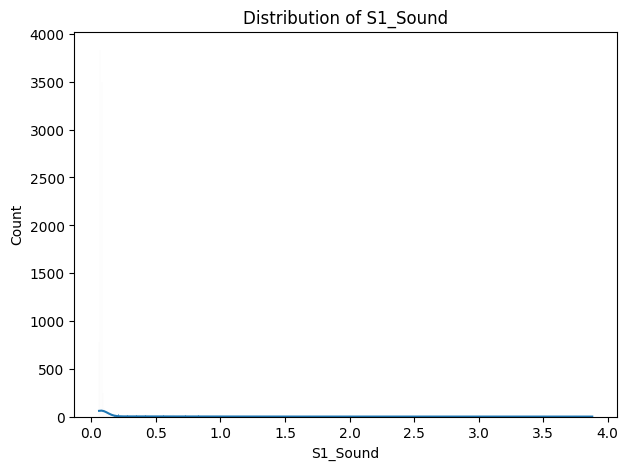

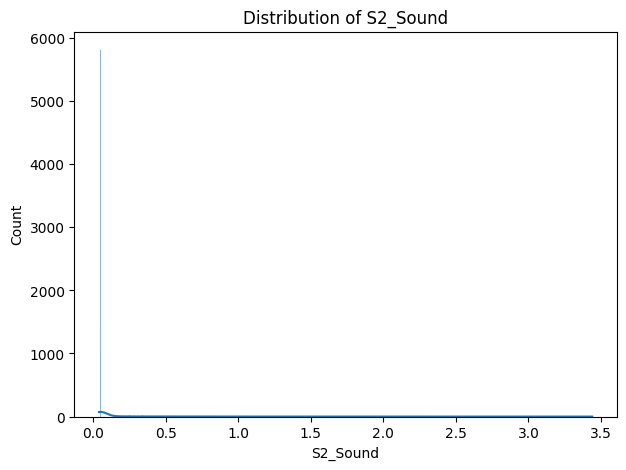

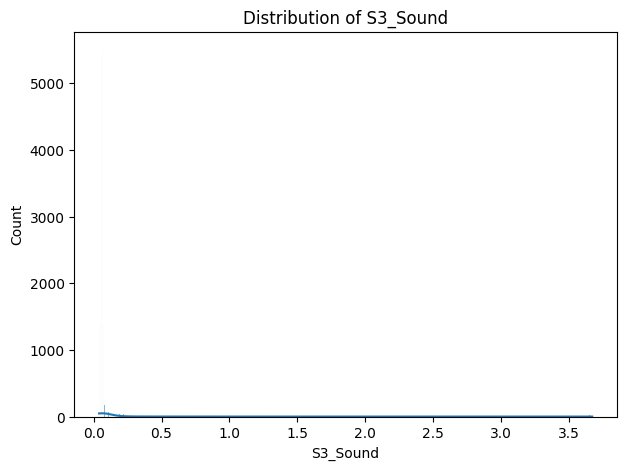

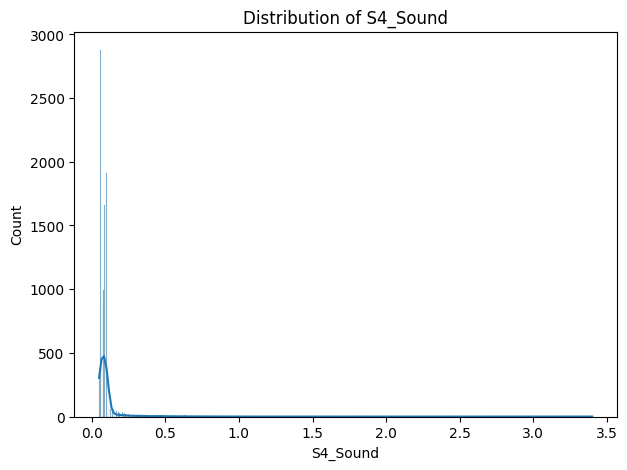

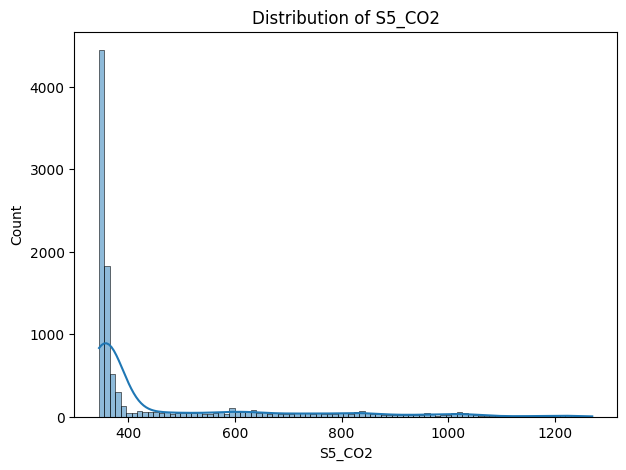

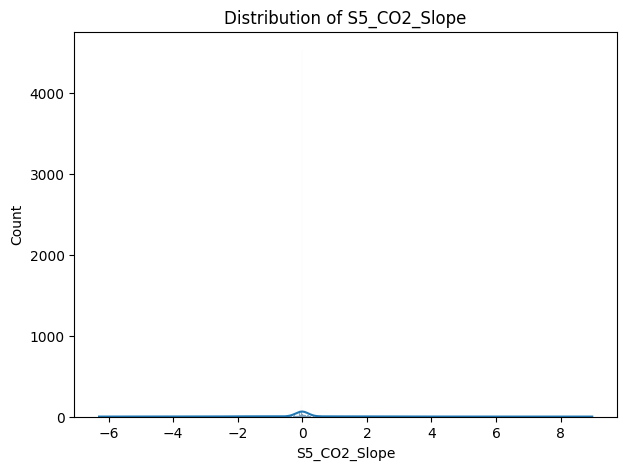

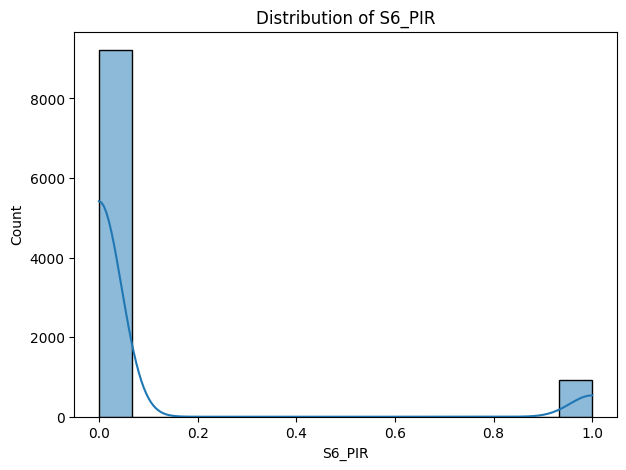

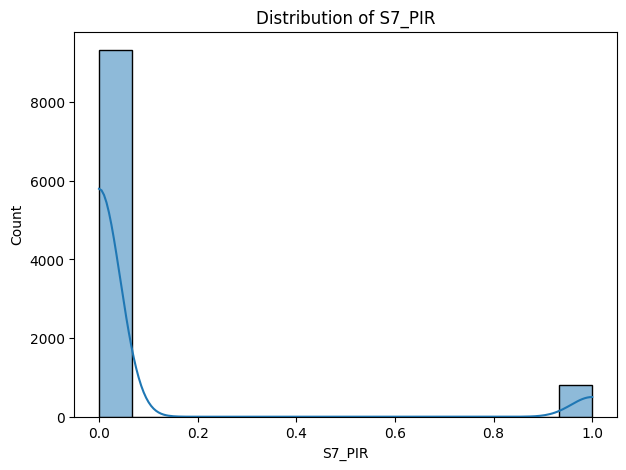

In [17]:
for column in data.columns[:-2]:
    plt.figure(figsize=(7, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

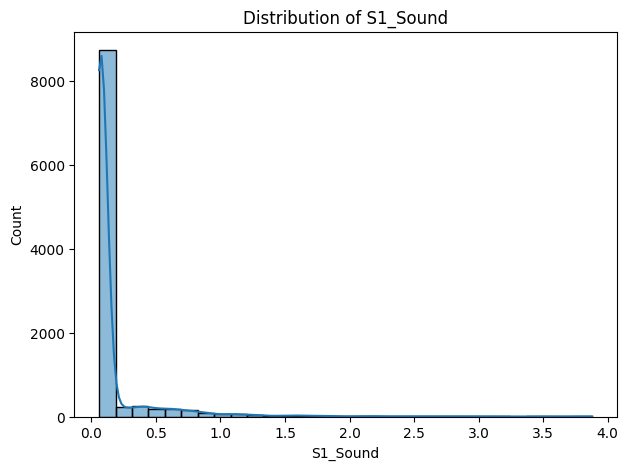

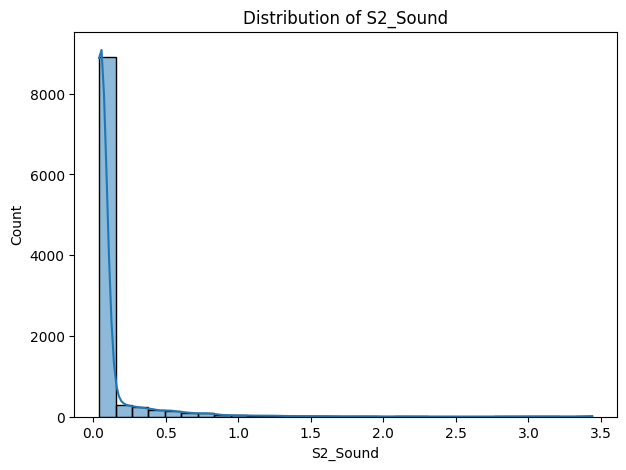

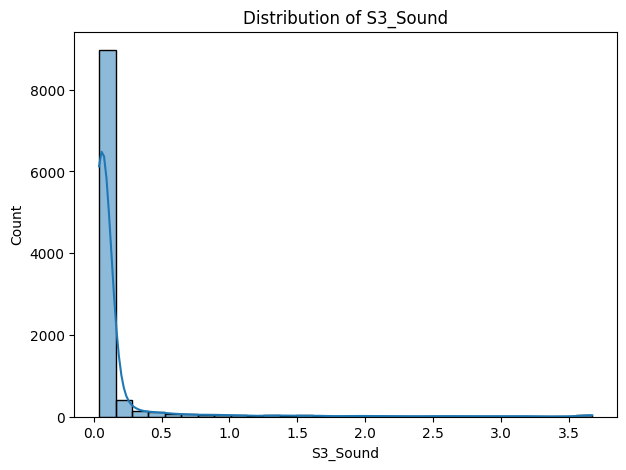

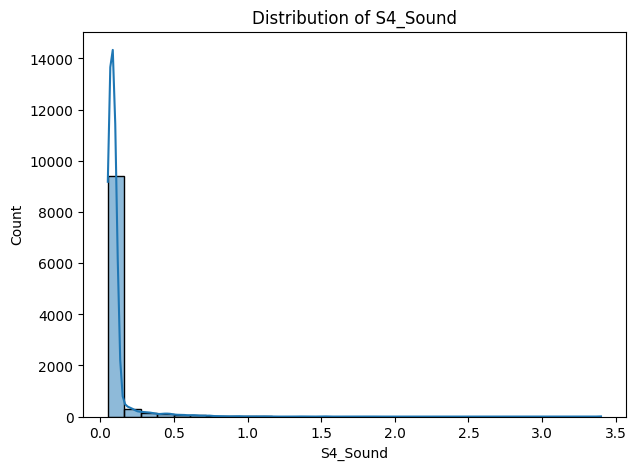

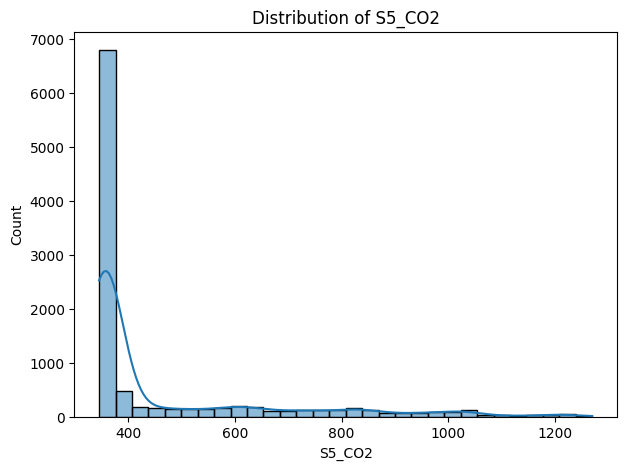

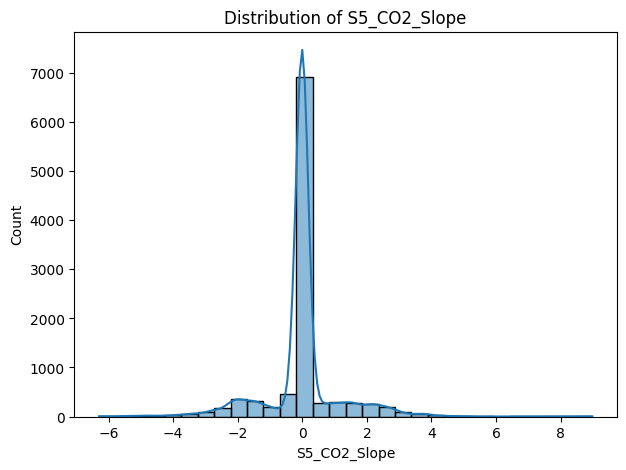

In [47]:
for column in data.columns[7:13]:
    plt.figure(figsize=(7, 5))
    sns.histplot(data[column], kde=True,bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

Korelacija izmedju varijabli

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'S1_Temp'),
  Text(1.5, 0, 'S2_Temp'),
  Text(2.5, 0, 'S4_Temp'),
  Text(3.5, 0, 'S1_Light'),
  Text(4.5, 0, 'S2_Light'),
  Text(5.5, 0, 'S3_Light'),
  Text(6.5, 0, 'S4_Light'),
  Text(7.5, 0, 'S1_Sound'),
  Text(8.5, 0, 'S2_Sound'),
  Text(9.5, 0, 'S3_Sound'),
  Text(10.5, 0, 'S4_Sound'),
  Text(11.5, 0, 'S5_CO2'),
  Text(12.5, 0, 'S5_CO2_Slope'),
  Text(13.5, 0, 'S6_PIR'),
  Text(14.5, 0, 'S7_PIR'),
  Text(15.5, 0, 'Room_Occupancy_Count'),
  Text(16.5, 0, 'Timestamp')])

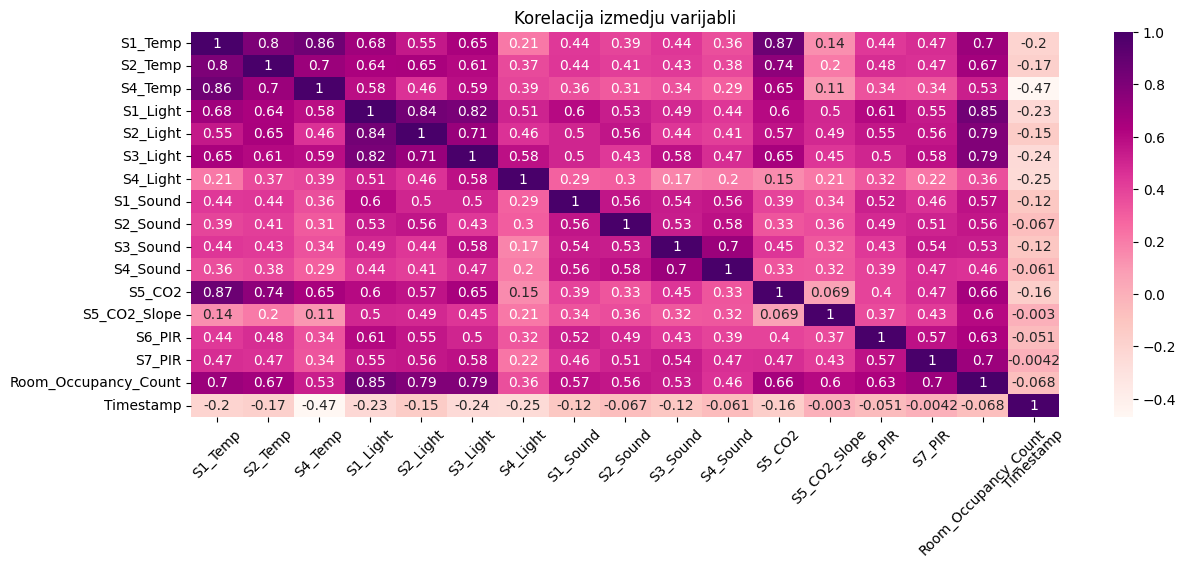

In [45]:
plt.subplots(figsize=(14,5))
correlation=data.corr()
sns.heatmap(correlation,annot=True,cmap='RdPu')
plt.title('Korelacija izmedju varijabli')
plt.xticks(rotation=45)

Mozemo primetiti da je veoma visoka korelacija izmedju S1_Temp i S3_Temp.
Uklonicemo S3_Temp.

In [15]:
data = data.drop(["S3_Temp"], axis=1)

In [58]:
data.columns

Index(['S1_Temp', 'S2_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2',
       'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count',
       'Timestamp'],
      dtype='object')

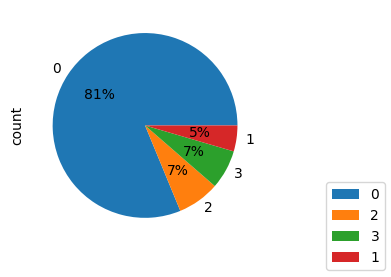

In [23]:
plt.figure(figsize=(5, 3))
pie = data.Room_Occupancy_Count.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(5, 3)
pie.figure.legend(loc='lower right')
plt.show()

In [59]:
cols = [col for col in data.columns if col not in ['Room_Occupancy_Count']]
data_features = data[cols]
target = data['Room_Occupancy_Count']
data_features.head(2)

,S1_Temp,S2_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Timestamp
0,24.94,24.75,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1513939781
1,24.94,24.75,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1513939812


In [60]:
# Convert to numpy array
from sklearn.model_selection import train_test_split

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")


Broj uzoraka u trening skupu podataka: 8103
Broj uzoraka u test skupu podataka: 2026


# Linear SVC

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svc_model = LinearSVC(random_state=0)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC accuracy :  0.8040473840078973


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, pred))

[[1629    0    0    0]
 [  82    0    0    0]
 [ 166    0    0    0]
 [ 149    0    0    0]]


In [28]:
from sklearn import preprocessing
from sklearn.svm import SVC

scaler = preprocessing.MinMaxScaler()

svc_model = SVC(kernel="linear",random_state=0,probability=True)

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.993583415597236
[[1626    1    0    2]
 [   0   80    2    0]
 [   0    1  160    5]
 [   0    0    2  147]]


In [29]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9945705824284304
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    1  160    5]
 [   0    0    2  147]]


In [58]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.RobustScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9940769990128332
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    2  159    5]
 [   0    0    2  147]]


In [70]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Podela skupa podataka
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicijalizacija modela i sklada
svc_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))


# Kros-validacija
cv_results = cross_validate(svc_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("LinearSVC cross validation accuracy: ", cv_results['test_score'])
print("Average Accuracy: ", np.mean(cv_results['test_score']))

LinearSVC cross validation accuracy:  [0.9911155  0.994077   0.99457058 0.99308983 0.99358025]
Average Accuracy:  0.9932866318111465


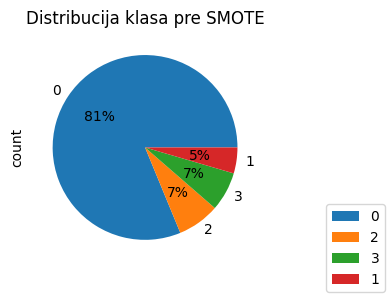

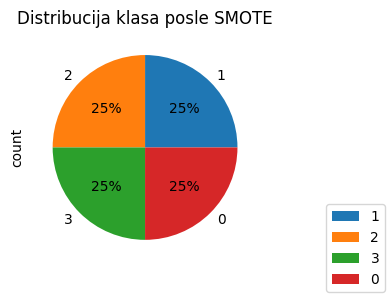

In [82]:
from imblearn.over_sampling import SMOTE

data_pre_smote = pd.DataFrame({'Class': target})
class_counts_pre_smote = data_pre_smote['Class'].value_counts()

plt.figure(figsize=(5, 3))
pie_pre_smote = class_counts_pre_smote.plot(kind='pie', autopct='%1.0f%%')
pie_pre_smote.figure.set_size_inches(5, 3)
pie_pre_smote.figure.legend(loc='lower right')
plt.title("Distribucija klasa pre SMOTE")
plt.show()

sm = SMOTE(random_state=2)
data_features_res, target_res = sm.fit_resample(data_features, target)

data_post_smote = pd.DataFrame({'Class': target_res})
class_counts_post_smote = data_post_smote['Class'].value_counts()

plt.figure(figsize=(5, 3))
pie_post_smote = class_counts_post_smote.plot(kind='pie', autopct='%1.0f%%')
pie_post_smote.figure.set_size_inches(5, 3)
pie_post_smote.figure.legend(loc='lower right')
plt.title("Distribucija klasa posle SMOTE")
plt.show()

In [85]:
# Podela podataka na trening i test skup
data_train, data_test, target_train, target_test = train_test_split(data_features_res, target_res, test_size=0.2, random_state=10)

# Standardizacija podataka
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

# Inicijalizacija i treniranje modela LinearSVC
svc_model = LinearSVC()
svc_model.fit(data_train_scaled, target_train)

# Predikcija na test skupu
pred = svc_model.predict(data_test_scaled)

# Evaluacija performansi modela
print("LinearSVC accuracy after SMOTE:  ", (accuracy_score(target_test, pred)))

LinearSVC accuracy after SMOTE:   0.9825307610511924


# KNeighbors klasifikator

In [86]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3)

nnModel = nearest_neighbors.fit(data_train,target_train)

predNN = nnModel.predict(data_test)

print("KNeighbors accuracy : ",accuracy_score(target_test, predNN, normalize = True))

KNeighbors accuracy :  0.9972656843384475


In [91]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)
# Podela skupa podataka
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicijalizacija modela i sklada
svc_model = make_pipeline(StandardScaler(), KNeighborsClassifier())


# Kros-validacija
cv_results = cross_validate(svc_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("KNeighbors cross validation accuracy: ", cv_results['test_score'])
print("Average Accuracy: ", np.mean(cv_results['test_score']))

KNeighbors cross validation accuracy:  [0.99160908 0.99160908 0.99160908 0.99308983 0.99209877]
Average Accuracy:  0.9920031686836557


In [94]:
# Podela podataka na trening i test skup
data_train, data_test, target_train, target_test = train_test_split(data_features_res, target_res, test_size=0.2, random_state=10)

# Standardizacija podataka
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

# Inicijalizacija i treniranje modela 
svc_model = KNeighborsClassifier()
svc_model.fit(data_train_scaled, target_train)

# Predikcija na test skupu
pred = svc_model.predict(data_test_scaled)

# Evaluacija performansi modela
print("KNeighborsClassifier accuracy after SMOTE:  ", (accuracy_score(target_test, pred)))

data_post_smote = pd.DataFrame({'Class': target_res})
class_counts_post_smote = data_post_smote['Class'].value_counts()


KNeighborsClassifier accuracy after SMOTE:   0.9960504329333131


# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

nbModel = naive_bayes.fit(data_train,target_train)

predNB = nbModel.predict(data_test)

print("Naive Bayes accuracy : ",accuracy_score(target_test, predNB, normalize = True))

Naive Bayes accuracy :  0.7882424426553243


In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, KFold

# Podela skupa podataka
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicijalizacija modela i sklada
svc_model = GaussianNB()


# Kros-validacija
cv_results = cross_validate(svc_model, data_features, target, cv=kfold, scoring='accuracy')

# Prikaz rezultata
print("GaussianNB cross validation accuracy: ", cv_results['test_score'])
print("Average Accuracy: ", np.mean(cv_results['test_score']))

GaussianNB cross validation accuracy:  [0.92448174 0.93435341 0.93435341 0.93385982 0.93481481]
Average Accuracy:  0.9323726371979086


In [98]:
# Podela podataka na trening i test skup
data_train, data_test, target_train, target_test = train_test_split(data_features_res, target_res, test_size=0.2, random_state=10)


# Inicijalizacija i treniranje modela 
svc_model = GaussianNB()
svc_model.fit(data_train, target_train)

# Predikcija na test skupu
pred = svc_model.predict(data_test)

# Evaluacija performansi modela
print("GaussianNB() accuracy after SMOTE:  ", (accuracy_score(target_test, pred)))

data_post_smote = pd.DataFrame({'Class': target_res})
class_counts_post_smote = data_post_smote['Class'].value_counts()

GaussianNB() accuracy after SMOTE:   0.7882424426553243


# Decision Tree klasifikator

In [99]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

print("DecisionTree accuracy : ", accuracy_score(target_test, predDT, normalize = True))

DecisionTree accuracy :  0.9981771228922983


# Random Forest klasifikator

In [110]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=0, criterion="entropy") 

randomForestModel = randomForest.fit(data_train, target_train)

predRFC = randomForestModel.predict(data_test)

print("RandomForest accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
print(confusion_matrix(target_test, predRFC))

RandomForest accuracy :  0.993583415597236
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    2  160    4]
 [   0    0    4  145]]


### Optimizacija Random Forest modela izborom relevantnih atributa

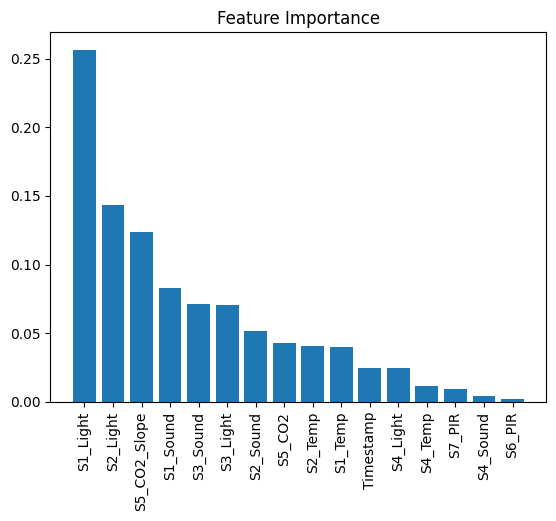

In [107]:
importances = randomForestModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(data_train.shape[1]), importances[indices])

plt.xticks(range(data_train.shape[1]), names, rotation=90)

plt.show()

In [111]:
# Sledeći deo koda selektuje atribute koji imaju značaj veći od 0,025 i trenira novi model nad transformisanim skupom podataka

from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(randomForest, threshold=th) 

    features_important = selector.fit_transform(data_train, target_train)

    test_important = selector.transform(data_test)

    randomForestModel = randomForest.fit(features_important,target_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
    print(confusion_matrix(target_test, predRFC))

selectFeaturesRF(0.025)


RandomForest accuracy :  0.9945705824284304
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    1  162    3]
 [   0    0    4  145]]


# Podesavanje hiperparametara

## SVC


In [ ]:
# Najbolja tačnost za SVC model istreniran bez podešavanja hiperparametara je 99,4%. 
#Korišćenjem RandomizedSearchCV (manje vremena za izracunavanje) biće izvršena optimizacija hiperparametara 
#kako bi se poboljšala tačnost modela i smanjila greška pri klasifikaciji:

In [44]:
from sklearn.model_selection import RandomizedSearchCV

svc_model = SVC()
hyperparameters = {'C': np.logspace(0,4,10), 
              'gamma': np.logspace(0,4,10,base=0.1),
             'kernel': ['rbf','poly','sigmoid']}
                 
rnd_search_cv = RandomizedSearchCV(svc_model,hyperparameters, cv=3, verbose=2, n_iter=100, random_state=1,
 n_jobs=-1)
best_SVC_model = rnd_search_cv.fit(data_train,target_train)
best_SVC_pred = best_SVC_model.predict(data_test)

print("Best SVC accuracy : ",accuracy_score(target_test, best_SVC_pred, normalize = True))
print(confusion_matrix(target_test, best_SVC_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best SVC accuracy :  0.9950641658440277
[[1628    1    0    0]
 [   0   81    1    0]
 [   1    2  162    1]
 [   1    0    3  145]]


In [45]:
print("Best estimator: ", rnd_search_cv.best_estimator_)
print("Best index: ",rnd_search_cv.best_index_)
print("Best parameters: ",rnd_search_cv.best_params_)
print("Best score: ",rnd_search_cv.best_score_)
print("Parameter distributions: ",rnd_search_cv.param_distributions)
print("Support vector size: ",rnd_search_cv.best_estimator_.n_support_)

Best estimator:  SVC(C=59.94842503189409, gamma=0.00010000000000000002)
Best index:  11
Best parameters:  {'kernel': 'rbf', 'gamma': 0.00010000000000000002, 'C': 59.94842503189409}
Best score:  0.9939528569665557
Parameter distributions:  {'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'gamma': array([1.00000000e+00, 3.59381366e-01, 1.29154967e-01, 4.64158883e-02,
       1.66810054e-02, 5.99484250e-03, 2.15443469e-03, 7.74263683e-04,
       2.78255940e-04, 1.00000000e-04]), 'kernel': ['rbf', 'poly', 'sigmoid']}
Support vector size:  [4646  258  397  367]


# KNeighbors klasifikator

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

hyperparameters = { 'n_neighbors': list(range(2, 31)),
               'weights': ['uniform','distance'],
               'metric': ['minkowski','euclidean','manhattan']}
grid_search_cv_knn = GridSearchCV(knn_model, hyperparameters, cv=10, verbose=2,
 n_jobs=-1,scoring="accuracy")
best_KNN_model = grid_search_cv_knn.fit(data_train, target_train)
print(best_KNN_model.best_params_)
best_KNN_pred = best_KNN_model.predict(data_test)

print("Best KNN accuracy : ",accuracy_score(target_test, best_KNN_pred, normalize = True))
print(confusion_matrix(target_test, best_KNN_pred))

Fitting 10 folds for each of 174 candidates, totalling 1740 fits
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best KNN accuracy :  0.9955577492596249
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    1  163    2]
 [   0    0    3  146]]


In [49]:
print("Best estimator: ", grid_search_cv_knn.best_estimator_)
print("Best index: ",grid_search_cv_knn.best_index_)
print("Best parameters: ",grid_search_cv_knn.best_params_)
print("Best score: ",grid_search_cv_knn.best_score_)
print("Parameter distributions: ",grid_search_cv_knn.param_grid)

Best estimator:  KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')
Best index:  129
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best score:  0.9991359546969905
Parameter distributions:  {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}


# Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

naive_bayes = GaussianNB()

grid_search_cv_nb = GridSearchCV(naive_bayes, params_NB, cv=10, verbose=2,
 n_jobs=-1,scoring="accuracy")
best_NB_model = grid_search_cv_nb.fit(data_train, target_train)
print(best_NB_model.best_params_)
best_NB_pred = best_NB_model.predict(data_test)

print("Best NB accuracy : ",accuracy_score(target_test, best_NB_pred, normalize = True))
print(confusion_matrix(target_test, best_NB_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 2.848035868435805e-09}
Best NB accuracy :  0.9254689042448174
[[1611    1    0   17]
 [   0   80    2    0]
 [   0    1  143   22]
 [  36    0   72   41]]


In [52]:
print("Best estimator: ", grid_search_cv_nb.best_estimator_)
print("Best index: ",grid_search_cv_nb.best_index_)
print("Best parameters: ",grid_search_cv_nb.best_params_)
print("Best score: ",grid_search_cv_nb.best_score_)
print("Parameter distributions: ",grid_search_cv_nb.param_grid)

Best estimator:  GaussianNB(var_smoothing=2.848035868435805e-09)
Best index:  94
Best parameters:  {'var_smoothing': 2.848035868435805e-09}
Best score:  0.9357021509795862
Parameter distributions:  {'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
   

# Decision Tree klasifikator

In [54]:
decisionTree = DecisionTreeClassifier(random_state=0)

params = {
    'max_depth': [2, 3, 5, 8,13,21],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,10),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0,0.1, .01, .001],
    'criterion': ["gini", "entropy"]
}

gs_cv_decision = GridSearchCV(decisionTree,params, cv=5, verbose=2,
 n_jobs=-1,scoring = 'accuracy')

best_DT_model = gs_cv_decision.fit(data_train,target_train)
best_DT_pred = best_DT_model.predict(data_test)

print("Best DT accuracy : ",accuracy_score(target_test, best_DT_pred, normalize = True))
print(confusion_matrix(target_test, best_DT_pred))

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Best DT accuracy :  0.9930898321816387
[[1627    1    0    1]
 [   0   80    2    0]
 [   0    2  160    4]
 [   0    0    4  145]]


In [55]:
print("Best estimator: ", gs_cv_decision.best_estimator_)
print("Best index: ",gs_cv_decision.best_index_)
print("Best parameters: ",gs_cv_decision.best_params_)
print("Best score: ",gs_cv_decision.best_score_)
print("Parameter distributions: ",gs_cv_decision.param_grid)

print("\nModel info:")
print("Feature importances: ",gs_cv_decision.best_estimator_.feature_importances_)
print("Depth of tree: ",gs_cv_decision.best_estimator_.get_depth())

Best estimator:  DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=13,
                       min_samples_split=9, random_state=0)
Best index:  967
Best parameters:  {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 13, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 9}
Best score:  0.997037950967624
Parameter distributions:  {'max_depth': [2, 3, 5, 8, 13, 21], 'min_samples_leaf': range(1, 5), 'min_samples_split': range(2, 10), 'max_features': [None, 'sqrt', 'log2'], 'ccp_alpha': [0, 0.1, 0.01, 0.001], 'criterion': ['gini', 'entropy']}

Model info:
Feature importances:  [0.04830906 0.00090777 0.         0.65951823 0.04633073 0.1207728
 0.         0.00745931 0.00219666 0.00119473 0.00205316 0.00156524
 0.10118853 0.         0.00177453 0.00672926]
Depth of tree:  10


# RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0, criterion='entropy')
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = range(2,10)

min_samples_leaf = range(1,5)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

rf_random = RandomizedSearchCV(rf_model,random_grid , cv = 3,random_state=0,n_iter=10 ,verbose=2, n_jobs = -1, scoring='accuracy')

best_rf_model = rf_random.fit(data_train,target_train)
best_rf_pred = best_rf_model.predict(data_test)

print("Best rf accuracy : ",accuracy_score(target_test, best_rf_pred, normalize = True))
print(confusion_matrix(target_test, best_rf_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best rf accuracy :  0.9940769990128332
[[1628    1    0    0]
 [   0   80    2    0]
 [   0    1  161    4]
 [   0    0    4  145]]


In [57]:
print("Best estimator: ", rf_random.best_estimator_)
print("Best index: ",rf_random.best_index_)
print("Best parameters: ",rf_random.best_params_)
print("Best score: ",rf_random.best_score_)
print("Parameter distributions: ",rf_random.param_distributions)

print("\nModel info:")
print("Feature importances: ",rf_random.best_estimator_.feature_importances_)
print("Number of trees: ",rf_random.best_estimator_.n_estimators)

Best estimator:  RandomForestClassifier(criterion='entropy', max_depth=80, min_samples_split=7,
                       n_estimators=2000, random_state=0)
Best index:  5
Best parameters:  {'n_estimators': 2000, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80}
Best score:  0.9983956559299024
Parameter distributions:  {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}

Model info:
Feature importances:  [0.03476868 0.03967352 0.0114171  0.26514882 0.14558076 0.07878743
 0.02754349 0.10036629 0.05169644 0.04545053 0.00426358 0.04720964
 0.11018111 0.00173162 0.00930904 0.02687194]
Number of trees:  2000


# Redukcija dimenzionalnosti